In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [43]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [44]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


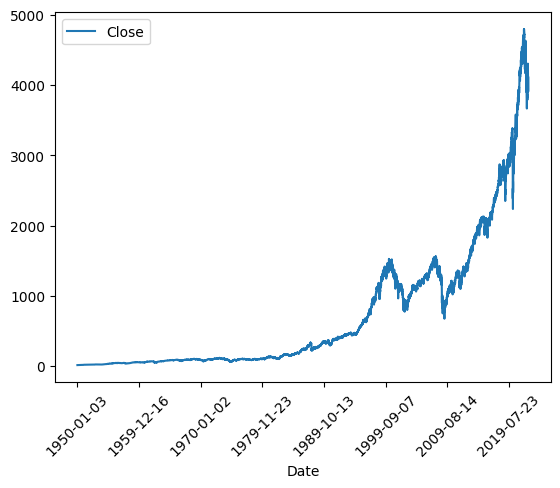

In [45]:
sp500.plot.line(y='Close', use_index=True)
plt.xticks(rotation=45)
plt.show()


In [47]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [48]:
sp500_hist= sp500[['Open', 'High', 'Low', 'Close', 'Volume']]
sp500_hist

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0


In [49]:
## create next day opening price column using closing price column
sp500_hist['Tomorrow']= sp500_hist['Close'].shift(-1)
sp500_hist.head()


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


In [52]:
sp500_hist['Target']= (sp500_hist['Tomorrow']> sp500_hist['Close']).astype(int)
sp500_hist

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


In [53]:
sp500_hist90 = sp500_hist.loc["1990-01-01":].copy()
sp500_hist90.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [54]:
sp500_hist90['Target'].value_counts()

,count
Target,
1,4414
0,3824


In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500_hist90.iloc[:-100]
test = sp500_hist90.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [57]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [62]:
preds = pd.Series(preds, index=test.index, name="Predictions")
preds

,Predictions
Date,
2022-04-20,1
2022-04-21,0
2022-04-22,0
2022-04-25,0
2022-04-26,1
...,...
2022-09-06,1
2022-09-07,0
2022-09-08,1


In [59]:
precision_score(test["Target"], preds)

0.47058823529411764

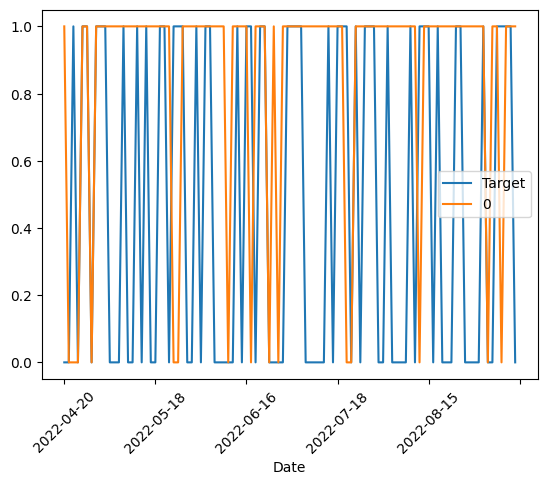

In [61]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()
plt.xticks(rotation=45)
plt.show()

In [63]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [64]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [67]:
predictions = backtest(sp500_hist90, model, predictors)


In [68]:

predictions["Predictions"].value_counts()

,count
Predictions,
0,3337
1,2401


In [69]:

precision_score(predictions["Target"], predictions["Predictions"])

0.534777176176593

In [70]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.536075
0,0.463925


In [71]:
# creating moving avarage to identify the prices
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500_hist90.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500_hist90[ratio_column] = sp500_hist90["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500_hist90[trend_column] = sp500_hist90.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]


In [73]:
sp500_hist90

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.982136,26.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.999819,27.0,0.919786,121.0,1.123489,543.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1,1.003294,2.0,1.012411,3.0,1.005349,28.0,0.926253,122.0,1.130564,543.0


In [74]:
sp500_ht90 = sp500_hist90.dropna(subset=sp500_hist90.columns[sp500_hist90.columns != "Tomorrow"])

In [76]:
sp500_ht90


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.982136,26.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.999819,27.0,0.919786,121.0,1.123489,543.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1,1.003294,2.0,1.012411,3.0,1.005349,28.0,0.926253,122.0,1.130564,543.0


In [77]:

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [78]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [79]:
predictions = backtest(sp500_ht90, model, new_predictors)

In [80]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,3934
1.0,804


In [81]:

precision_score(predictions["Target"], predictions["Predictions"])

0.5696517412935324

In [82]:

predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.546855
0,0.453145


In [83]:

predictions

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2022-09-06,1,0.0
2022-09-07,1,0.0
2022-09-08,1,0.0
